<a href="https://colab.research.google.com/github/Papabhalu/Analysis_of_CWC_centuries/blob/main/Analysis_of_Cricket_World_Cup_Centuries_BY_RD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving All-Cricket-World-Cup-Centuries.csv to All-Cricket-World-Cup-Centuries.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('All-Cricket-World-Cup-Centuries.csv')
data

,No.,Player,Runs,Balls,4s,6s,S/R,Team,Opposition,Venue,Date,Result
0,1,Dennis Amiss,137,147,18,0,93.19,England,India,"Lord's, London",07-Jun-75,Won
1,2,Glenn Turner,171*,201,16,2,85.07,New Zealand,East Africa,"Edgbaston Cricket Ground, Birmingham",07-Jun-75,Won
2,3,Keith Fletcher,131,147,13,0,89.11,England,New Zealand,"Trent Bridge, Nottingham",11-Jun-75,Won
3,4,Alan Turner,101,113,9,1,89.38,Australia,Sri Lanka,"The Oval, London",11-Jun-75,Won
4,5,Glenn Turner,114*,177,13,0,64.40,New Zealand,India,"Old Trafford Cricket Ground, Manchester",14-Jun-75,Won
...,...,...,...,...,...,...,...,...,...,...,...,...
191,192,Angelo Mathews,113,128,10,2,88.28,Sri Lanka,India,"Headingley Stadium, Leeds",06-Jul-19,Lost
192,193,Rohit Sharma,103,94,14,2,109.57,India,Sri Lanka,"Headingley Stadium, Leeds",06-Jul-19,Won
193,194,KL Rahul,111,118,11,1,94.06,India,Sri Lanka,"Headingley Stadium, Leeds",06-Jul-19,Won
194,195,Faf du Plessis,100,94,7,2,106.38,South Africa,Australia,"Old Trafford Cricket Ground, Manchester",06-Jul-19,Won


**COMPARISON OF CENTURIES SCORED BY TEAMS AGAINST DIFFERENT OPPOSITIONS AND ANALYSIS OF TEAM PERFORMANCE IN OLD TRAFFORD CRICKET GROUND, MANCHESTER.**

Comparison of Centuries Scored by Teams against Different Oppositions:
Team        Opposition  
 Australia   Afghanistan    1
             Bangladesh     1
             England        2
             India          6
             Kenya          1
                           ..
 Zimbabwe    India          1
             Ireland        1
             Namibia        1
             New Zealand    1
             Sri Lanka      1
Length: 105, dtype: int64


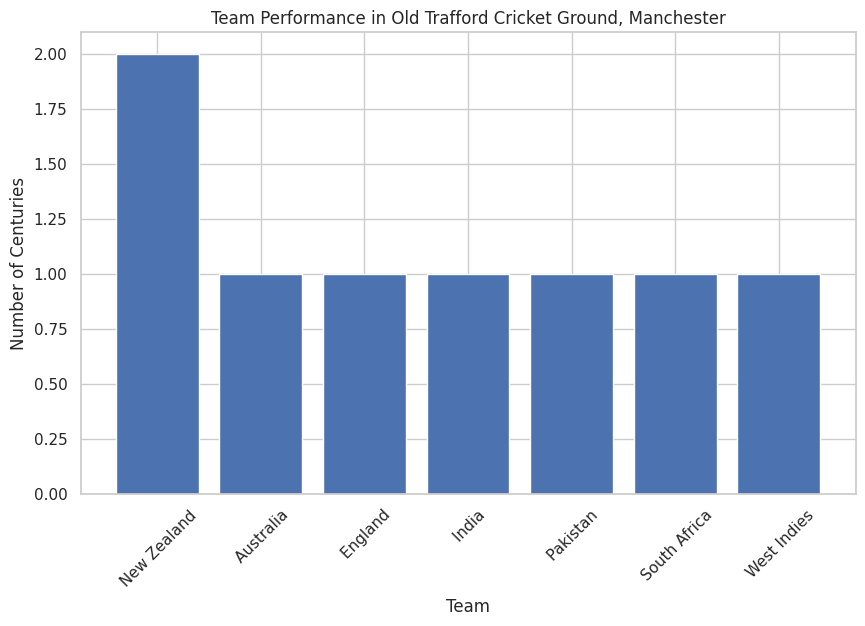

In [11]:
# Group the data by team and opposition, and count the number of centuries
team_opposition_centuries = data.groupby(['Team', 'Opposition']).size()

print("Comparison of Centuries Scored by Teams against Different Oppositions:")
print(team_opposition_centuries)

# Group the data by team and count the total number of centuries
team_centuries = data.groupby('Team').size()

# Group the data by team and venue and count the number of centuries
team_venue_centuries = data.groupby(['Team', 'Venue']).size().reset_index(name='Centuries')

# Select a specific venue for analysis
selected_venue = 'Old Trafford Cricket Ground, Manchester'

# Filter the data for the selected venue
venue_data = team_venue_centuries[team_venue_centuries['Venue'] == selected_venue]

# Sort the data by the number of centuries in descending order
venue_data_sorted = venue_data.sort_values('Centuries', ascending=False)

# Plot the team performance in the selected venue
plt.figure(figsize=(10, 6))
plt.bar(venue_data_sorted['Team'], venue_data_sorted['Centuries'])
plt.xlabel('Team')
plt.ylabel('Number of Centuries')
plt.title('Team Performance in ' + selected_venue)
plt.xticks(rotation=45)
plt.show()

**AS SEEN IN THE GRAPH OF OUR ANALYSIS ABOVE, NEW ZEALAND HAS THE BEST PERFORMANCE ( MAXIMUM NUMBER OF CENTURIES ) AT OLD TRAFFORD,MANCHESTER.**

**PLAYERS WITH THE HIGHEST NUMBER OF CENTURIES.**

<ipython-input-10-f17b3ec9993f>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_players, x='Player', y='Centuries', palette=colors)


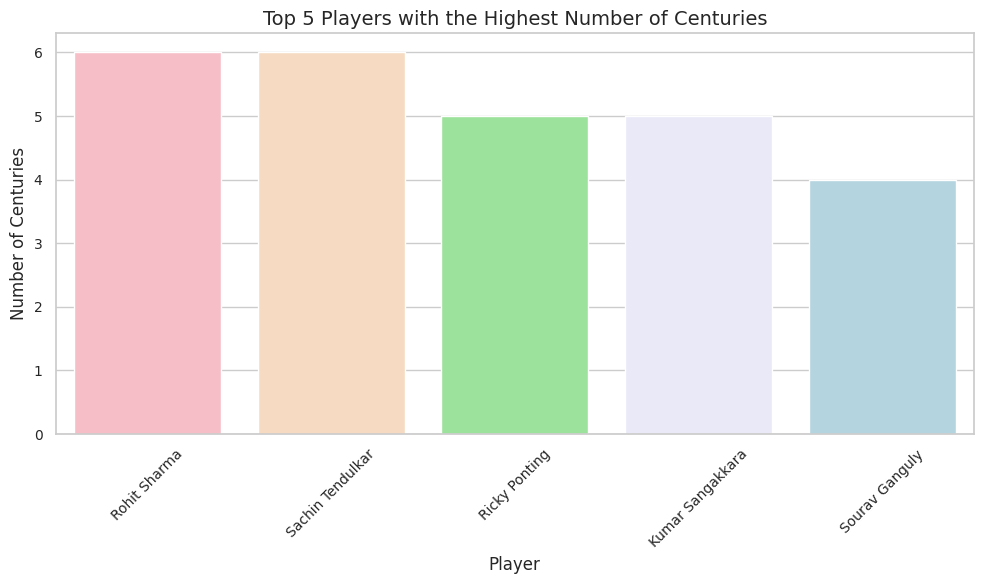

In [10]:
# Function to clean the 'Runs' column
def clean_runs_column(runs_value):
    if isinstance(runs_value, str):
        return int(runs_value.replace('*', ''))
    return runs_value

# Clean the 'Runs' column and convert it to integers
data['Runs'] = data['Runs'].apply(clean_runs_column)

# Calculate the number of centuries for each player
player_centuries = data[data['Runs'] >= 100].groupby('Player').size().reset_index(name='Centuries')

# Sort the players based on the number of centuries in descending order
player_centuries_sorted = player_centuries.sort_values('Centuries', ascending=False)

# Select the top 5 players with the highest number of centuries
top_5_players = player_centuries_sorted.head(5)

# Define colors for the bar plot
colors = ['#FFB6C1', '#FFDAB9', '#90EE90', '#E6E6FA', '#ADD8E6']

# Set seaborn style to "whitegrid"
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_players, x='Player', y='Centuries', palette=colors)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Number of Centuries', fontsize=12)
plt.title('Top 5 Players with the Highest Number of Centuries', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**AS SEEN IN OUR ANALYSIS ABOVE, ROHIT SHARMA AND SACHIN TENDULKAR BOTH HOLD THE RECORD FOR SCORING THE MAXIMUM NUMBER OF CENTURIES, WHICH IS 6.**

**IMPACT OF CENTURIES ON MATCH RESULTS**

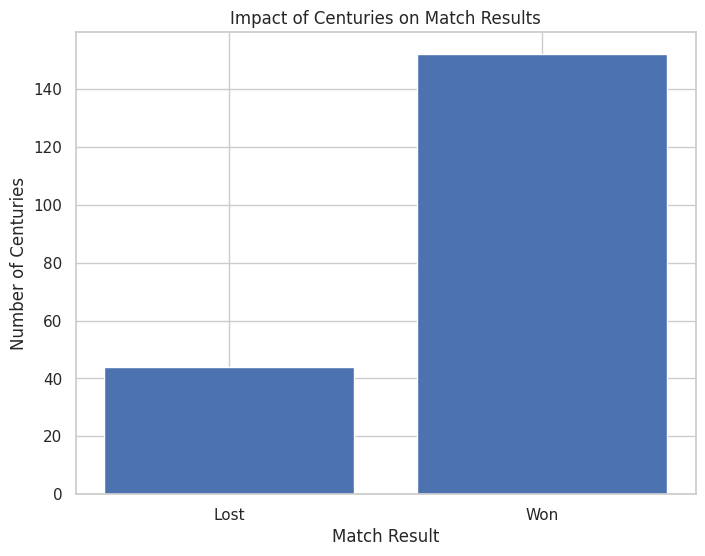

In [9]:
data = pd.read_csv('All-Cricket-World-Cup-Centuries.csv')

# Create a new column to indicate if the team won the match
data['Match_Result'] = data['Result'].apply(lambda x: 'Won' if 'won' in x.lower() else 'Lost')

# Calculate the number of centuries resulting in a win or loss
centuries_win_loss = data.groupby('Match_Result')['Player'].count()

# Plot the impact of centuries on match results
plt.figure(figsize=(8, 6))
plt.bar(centuries_win_loss.index, centuries_win_loss.values)
plt.xlabel('Match Result')
plt.ylabel('Number of Centuries')
plt.title('Impact of Centuries on Match Results')
plt.show()

**FROM OUR ANALYSIS ABOVE, WE CAN DEDUCE THAT CENTURIES SCORED BY A PLAYER FROM A PARTICULAR TEAM IN A MATCH HAS MOST OFTEN RESULTED IN THAT TEAM WINNING THE MATCH.**

**PLAYERS WITH MOST 4S AND 6S IN THEIR CENTURIES.**

In [8]:
# Group the data by player and calculate the total 4s and 6s
player_shots = data.groupby('Player')[['4s', '6s']].sum()

# Sort the players based on their total 4s in descending order
players_most_4s = player_shots['4s'].sort_values(ascending=False)

# Sort the players based on their total 6s in descending order
players_most_6s = player_shots['6s'].sort_values(ascending=False)

print("Players with the most 4s in their centuries:")
print(players_most_4s.head())

print("\nPlayers with the most 6s in their centuries:")
print(players_most_6s.head())

Players with the most 4s in their centuries:
Player
Rohit Sharma            77
Sachin Tendulkar        75
Kumar Sangakkara        60
David Warner            59
Tillakaratne Dilshan    58
Name: 4s, dtype: int64

Players with the most 6s in their centuries:
Player
AB de Villiers    19
Ricky Ponting     19
Chris Gayle       18
Sourav Ganguly    18
Eoin Morgan       17
Name: 6s, dtype: int64


**RELATIONSHIP BETWEEN BATTING AVERAGE AND STRIKE RATE IN THE OVAL, LONDON.**

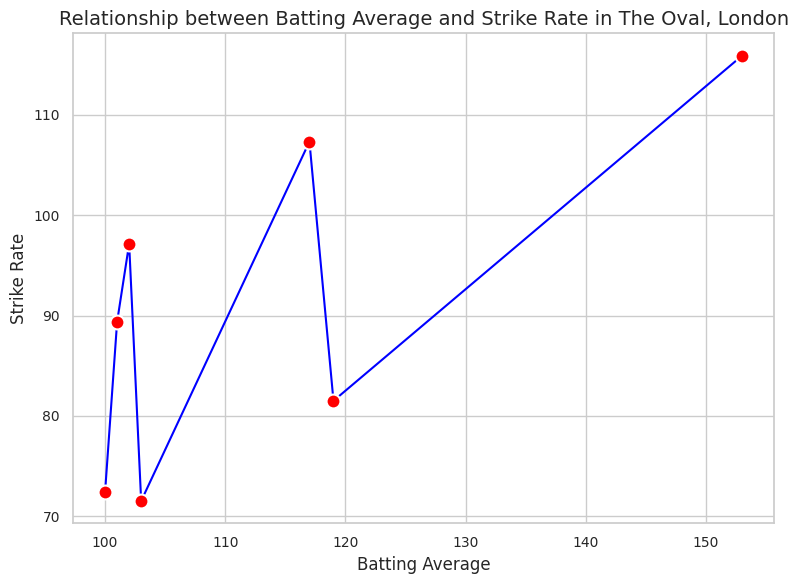

In [7]:
def clean_runs_column(runs_value):
    if isinstance(runs_value, str):
        return int(runs_value.replace('*', ''))
    return runs_value

# Check if 'Runs' column contains non-numeric values before cleaning and converting
if data['Runs'].dtype == object:
    data['Runs'] = data['Runs'].apply(clean_runs_column)

# Filter data for the selected venue
selected_venue = "The Oval, London"
venue_data = data[data['Venue'] == selected_venue]

# Group data by player and calculate mean of 'Runs' and 'S/R'
player_stats = venue_data.groupby('Player').agg({'Runs': 'mean', 'S/R': 'mean'}).reset_index()

# Set seaborn style to "whitegrid"
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=player_stats, x='Runs', y='S/R', color='blue', marker='o', markersize=10, markerfacecolor='red', markeredgewidth=1.5)
plt.xlabel('Batting Average', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.title('Relationship between Batting Average and Strike Rate in ' + selected_venue, fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**CENTURIES SCORED BY PLAYERS FROM DIFFERENT TEAMS.**

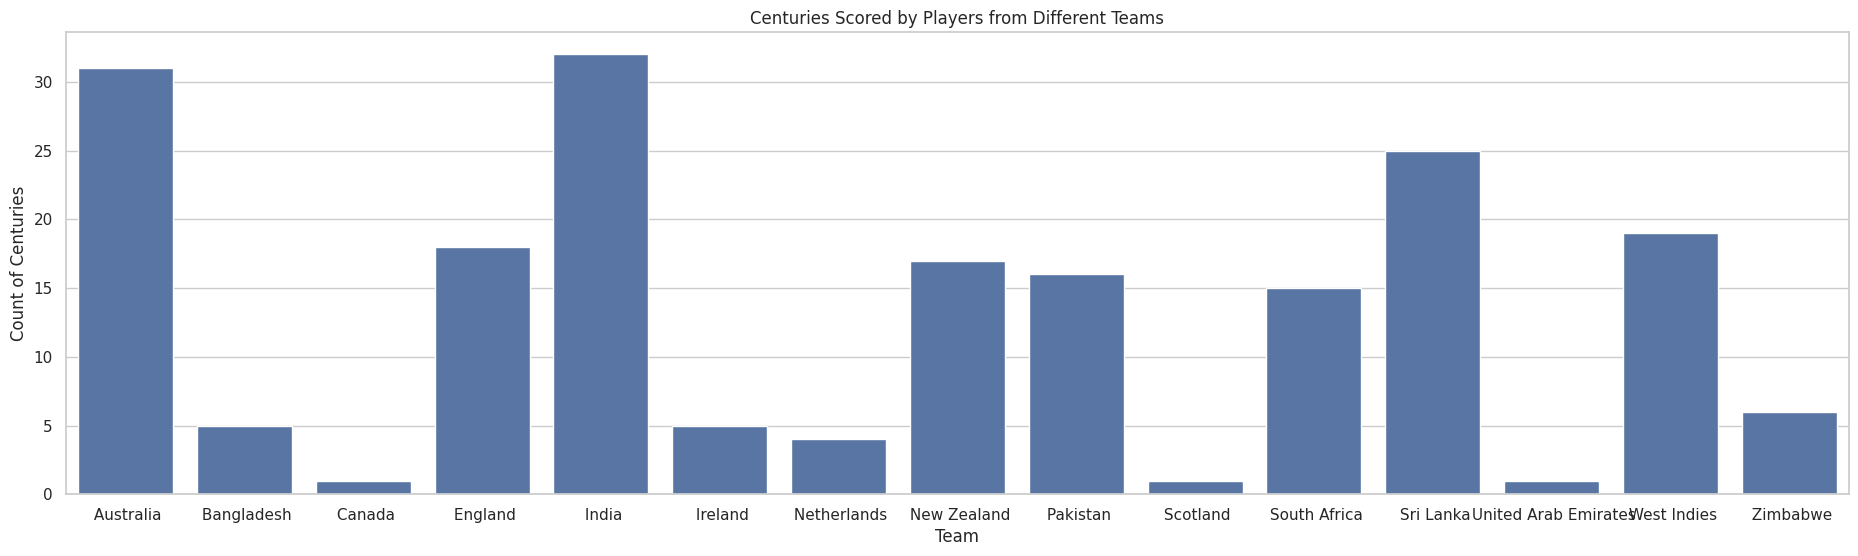

In [12]:
# Filter the data for centuries
centuries_data = data[data['Runs'] >= 100]

# Count the number of centuries scored by players from each team
centuries_by_team = centuries_data.groupby('Team')['Player'].count().reset_index()

# Plotting the data
plt.figure(figsize=(23, 6))
sns.barplot(data=centuries_by_team, x='Team', y='Player')
plt.title('Centuries Scored by Players from Different Teams')
plt.xlabel('Team')
plt.ylabel('Count of Centuries')

plt.show()

**FROM THE GRAPH ABOVE, IT IS EVIDENT THAT PLAYERS FROM TEAM INDIA HAVE SCORED THE MAXIMUM NUMBER OF CENTURIES IN CRICKET WORLD CUPS, CLOSELY FOLLOWED BY TEAM AUSTRALIA AND THEN TEAM SRI LANKA. ON THE OTHER HAND, TEAM CANADA, TEAM SCOTLAND AND TEAM UAE HAVE SCORED THE LEAST NUMBER OF CENTURIES IN WORLD CUP.**

## **RELATIONSHIP BETWEEN BATTING AVERAGE AND STRIKE RATE IN LORD'S, LONDON**

---

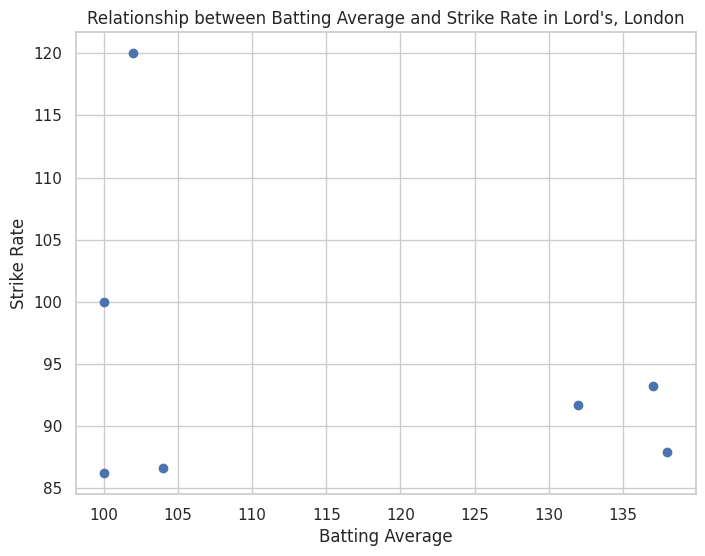

In [13]:
# Select a specific venue for analysis
selected_venue = "Lord's, London"

# Filter the data for the selected venue
venue_data = data[data['Venue'] == selected_venue]

# Group the data by player and calculate the batting average and strike rate
player_stats = venue_data.groupby('Player').agg({'Runs': 'mean', 'S/R': 'mean'}).reset_index()

# Plot the relationship between batting averages and strike rates
plt.figure(figsize=(8, 6))
plt.scatter(player_stats['Runs'], player_stats['S/R'])
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.title('Relationship between Batting Average and Strike Rate in ' + selected_venue)
plt.show()

## **ANALYSIS OF TEAM PERFORMANCE IN LORD'S, LONDON**

---

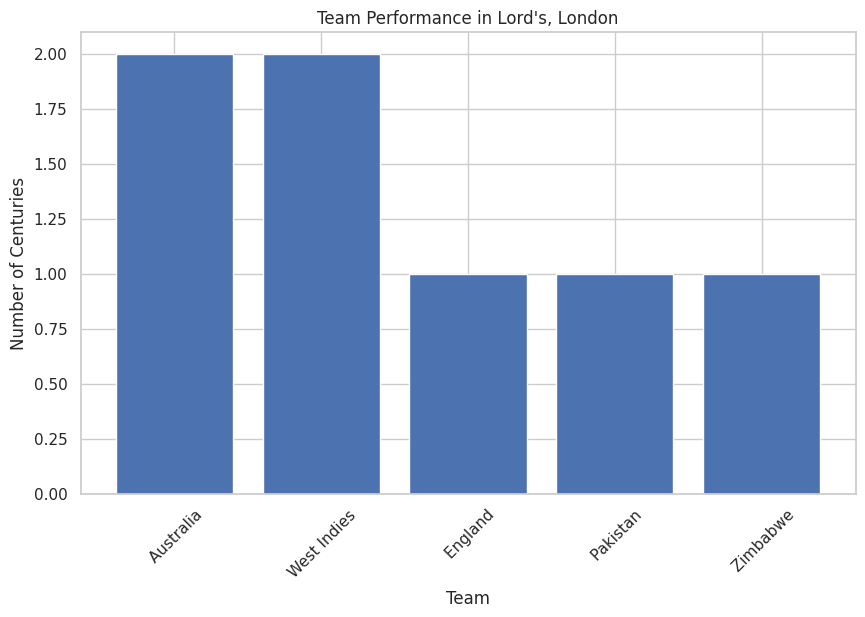

In [14]:
# Group the data by team and count the total number of centuries
team_centuries = data.groupby('Team').size()

# Group the data by team and venue and count the number of centuries
team_venue_centuries = data.groupby(['Team', 'Venue']).size().reset_index(name='Centuries')

# Select a specific venue for analysis
selected_venue = "Lord's, London"

# Filter the data for the selected venue
venue_data = team_venue_centuries[team_venue_centuries['Venue'] == selected_venue]

# Sort the data by the number of centuries in descending order
venue_data_sorted = venue_data.sort_values('Centuries', ascending=False)

# Plot the team performance in the selected venue
plt.figure(figsize=(10, 6))
plt.bar(venue_data_sorted['Team'], venue_data_sorted['Centuries'])
plt.xlabel('Team')
plt.ylabel('Number of Centuries')
plt.title('Team Performance in ' + selected_venue)
plt.xticks(rotation=45)
plt.show()